<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/9%20-%20Classification/walkthrough/WalkthroughClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Classification is part of **supervised learning**. <br>
### Here is a quick reminder: <br>

#### Types of Machine Learning models: 
- Supervised Learning:
  - **Classification**
  - Regression
- Unsupervised Learning:
  - Dimensionality Reduction 
  - Clustering
- others

The idea is to classify items of a dataset into **predefined classes** for which labelled data is already available.

#### Examples of classification: <br>
- Image classification (Is this a cat or not?)
- Risky or safe loan application (Should a bank provide a loan to applicant or not?)
- Prediction of customer behaviour (will a customer buy this new product or not?)
- etc.






For the Walkthough we will use a **dataset on wine quality**. As usual, you can find it in the /data folder.

<img src='https://assets.pbimgs.com/pbimgs/rk/images/dp/wcm/202145/0002/schott-zwiesel-classico-wine-glasses-c.jpg' width="300">

The wine data set consists of 11 different parameters of wine such as alcohol and ash content which was measured for several wine samples. These wines were derived from different cultivars; therefore there are different classes of wine saved under `quality`. The goal here is to find a model that can predict the class of wine given the 13 measured parameters and find out the major differences among the three different classes.

In [35]:
#Load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/winequality-red.csv'
wines = pd.read_csv(url)
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [36]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
#Define features and target variable
X = wines.drop(columns='quality')
y = wines['quality']

Let's see the different classes of wine quality.

In [38]:
wines['quality'].value_counts()

0    681
1    638
Name: quality, dtype: int64

In this exercise, we are going to classify wine based on its content characteristics to find the quality category to which it corresponds to.  

#### 1) Split into train and test set
 
The data is split into random train and test subsets. The training set contains a known output and the model learns its parameters from this data. We use the test dataset in order to test our prediction against the labels available for the test subset.


In [39]:
#Split data set into a train and a test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3)

In [40]:
print(f"X_train has {X_train.shape[0]} rows, X_test has {X_test.shape[0]} rows")

X_train has 923 rows, X_test has 396 rows


#### 2) Normalization

When we have a dataset with features that have very distinct ranges (for example one feature where age is between 0 and 99 years and another feature being the income ranging from 1'000CHF to 200'000CHF) we might get biaised results. We want the features to be in the same or similar range. Therefore, we **normalize** the data. It involves transforming all values for a specific attribute so that they fall within a small specified range.
We can use *StandardScaler()*, *MinMaxScaler* () or others for normalization.

<br>

In our example we will normalize both our **train AND test data** using MinMaxScaler.

The MinMax Scaler applies this transformation to every attribute separately:  
$$x_{scaled}=\frac{x_{i} -min(x)}{max(x)-min(x)}$$

/!\ **IMPORTANT**: When you normalize the train data, you need to do the same modification (here normalization) to the test data. 

In [41]:
#import the scaler
from sklearn.preprocessing import MinMaxScaler

#create an instance of the scaler
scaler = MinMaxScaler()

# fit the scaler to the training set of features
scaler.fit(X_train) # here the scaler learns the min and max of each attribute from the training set

MinMaxScaler()

In [42]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#### 3) Building the Classifier or Model <br>

First we will need to create our model which can be for example a *Linear Regression* (simple linear classifier, simple quadratic classifier) or a *Logistic Regression*. We will build the model from the **training set** and evaluate it on the **test set**. 

In [43]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [44]:
#Fit model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 4) Using the Classifier to make predictions

Once our model has been built we can use the **test set** to predict the model. Basically, the test data is used to estimate the accuracy of the classification model. If the accuracy is considered acceptable we can use our model for new data. <br>
*/!\ When using new data with our model we will also need to normalize this data.*

In [45]:
y_pred= model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [46]:
# but with what probability does our model predict each label?
model.predict_proba(X_test)[0:5]

array([[0.23691554, 0.76308446],
       [0.21213663, 0.78786337],
       [0.93071408, 0.06928592],
       [0.85868188, 0.14131812],
       [0.63529699, 0.36470301]])

#### 5) Evaluation of our Classification Model

We want to check the accuracy of our model using train and test data. 

In [47]:
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

# Also possible to calculate accuracy on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))

Accuracy of Logistic regression classifier on test set: 0.71
Accuracy of Logistic regression classifier on training set: 0.72


Another function for obtaining the same test accuracy score below. This uses as the 2nd parameter the predicted labels we obtained above.

In [48]:
from sklearn.metrics import accuracy_score
print(f"ACCURACY SCORE (TEST SET): {accuracy_score(y_test, y_pred) :.2f}")

ACCURACY SCORE (TEST SET): 0.71


####Baserate for evaluation

Our model has an accuracy of approximately 70%? Is it good or bad? 

Let's investigate the distribution of the predicted class in the original data: 


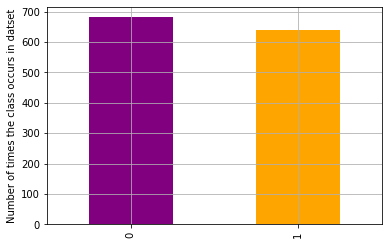

In [49]:
y.value_counts().plot.bar(color=['purple', 'orange'], grid=True)
plt.ylabel('Number of times the class occurs in datset');


It all depends on the baserate. Baserate = $\frac{\text{most frequent class}}{\text{total observations}}$

If the base rate is too high then the classification can be biaised, meaning that the data set has too many observations of one class compared to the other classes and has hence more impact on the classification results. 

Let's calculate the base rate!

In [50]:
#Compute the base rate
#Baserate = (# occurance most frequent class)/(# total observations)

quality_0 = wines.loc[wines["quality"] == 0].shape[0]
print("# occurance of class 0 ", quality_0)
quality_1 = wines.loc[wines["quality"] == 1].shape[0]
print("# occurance of class 1 ", quality_1)
print("Baserate = ", max(quality_0, quality_1)/(wines["quality"].shape[0]))

# occurance of class 0  681
# occurance of class 1  638
Baserate =  0.5163002274450341


####Confusion matrix
The confusion matrix allows us to get more detail on the performance of our model. It will allow us to see what our classification model is getting right and what types of errors it is making.

You will get this: 

|   | Class 0 predicted  | Class 1 predicted  |    
|---|---|---|
| **Class 0 actual**  |  TN |FP   |    
| **Class 1 actual**  | FN  | TP  |   

<br>

where TP = true positive, FN = false negative, FP = false positive and TN = true negative. Here class 1 is considered the "True" class.
          

In [51]:
pd.Series(y_pred).value_counts()

0    213
1    183
dtype: int64

Our model predicts 213 class 0 and 183 class 1 wine samples on the test set.

In [52]:
y_test.value_counts()

0    211
1    185
Name: quality, dtype: int64

In reality the test set contains 211 class 0 and 185 class 1 wine samples.   
But how many of our class 0 predictions are actual class 0 samples?

In [53]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[154,  57],
       [ 59, 126]])

Another way to visualise our confustion matrix with some help from seaborn.

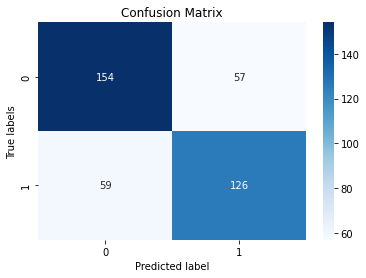

In [54]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix');

One score wich is always interesting to compute in order to have a robust idea of the model performance is to compute the precision.   
**Precision:** how many times our model is correct when predicting the positive class (1). TP/(TP+FP) = 126/(126+57)=0.688
 

In [55]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6885245901639344

In [56]:
# this is precision score for class 1 calculated by hand
126/(126+57)

0.6885245901639344

In [57]:
# precision score for both classes 0 and 1
precision_score(y_test, y_pred, average=None)

array([0.72300469, 0.68852459])

#### 6) Visualization of our Model / Decision boundary 

Now, for visualization purposes, let's build a 2d model to predict quality from alcohol and sulphite content and plot the decision boundary. In fact, depending on how many classes we have we will see different zones on the graph. Each zone corresponds to a class. Decision boundaries indicate the lines above / below which a data point belongs to one or another class.

However here we visualize 2 dimensional data for a binary classification model (2 classes). 







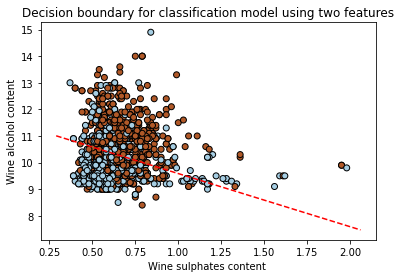

In [58]:
#Decision boundaries
import numpy as np
import matplotlib.pyplot as plt


X = X [['sulphates', 'alcohol']]
model = LogisticRegression()
model.fit(X, y)


plt.scatter(X['sulphates'].values, X['alcohol'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Wine sulphates content ')
plt.ylabel('Wine alcohol content')
plt.title('Decision boundary for classification model using two features')

plt.show()

In [59]:
model.intercept_

array([-10.59538764])

In [60]:
model.coef_

array([[1.82737619, 0.91461387]])

Let's interpret this graph. The red doted line shows the boundary between the two regions. Everything on one side of this line will be in one class while everything on the other side will be on the other class. 
Furthermore, the closer a point is to the decision region boundary the more uncertain we are about the accuracy of the classification. This doted line is found using the coefficient of our model.

####7) Let's see how our model would classify new data points

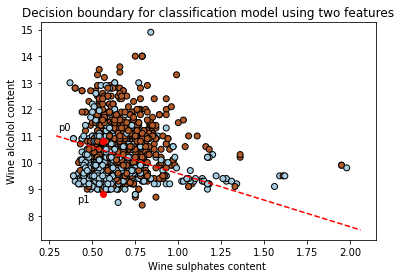

In [71]:
X = X [['sulphates', 'alcohol']]
model = LogisticRegression()
model.fit(X, y)


plt.scatter(X['sulphates'].values, X['alcohol'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Wine sulphates content ')
plt.ylabel('Wine alcohol content')
plt.title('Decision boundary for classification model using two features')

#two new unseen points
plt.scatter(0.56, 10.8, c='red') # p0
plt.scatter(0.56, 8.8, c='red') #p1
plt.text(0.3, 11.2, 'p0') # the label of p0
plt.text(0.41, 8.5, 'p1') # the label of p1

plt.show()

In [61]:
x_new=pd.DataFrame([[0.56,10.8], [0.56,8.8]], columns=['sulphates', 'alcohol'])
x_new

,sulphates,alcohol
0,0.56,10.8
1,0.56,8.8


In [62]:
model.predict(x_new)

array([1, 0])

As expected a wine with sulphite at 0.56 and an alcohol percentage of 8.8 is in one class while for the same sulphite content but for an alcohol percentage of 10.8 the wine belongs to the other class.

We can also compute the probability of making the correct prediction. Obviously any point on the boundary has equal probability for both classes

In [64]:
model.predict_proba(x_new)

array([[0.42414687, 0.57585313],
       [0.82104667, 0.17895333]])

We see that the second data point is correclty classified with almost certainty. It makes sense since it is located far from the boundary. However, for the first one, it is way more uncertain

#### 8) Adding Cross Validation
We will use logisitic regression with CROSS VALIDATION. So, instead of LogisticRegresion() we will use LogisticRegresionCV(CV= K)

To prevent overfitting we can use cross-validation. We will as before split the data set into train and test data, 
fit the model using training data and evaluate the model using testing data. **The difference** is that we will now repeat the process K times then take average of the testing errors as a final performance measure.



In [29]:
#Create model
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [30]:
#Fit the model using the training data
model_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

In [31]:
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model_cv.score(X_test, y_test)))

# also possible to calculate on the test set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model_cv.score(X_train, y_train)))

Accuracy of Logistic regression classifier on test set: 0.70
Accuracy of Logistic regression classifier on training set: 0.72


In [32]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, model_cv.predict(X_test))
print(cf)

[[148  63]
 [ 55 130]]


Let's make the confusion matrix a little bit nicer.

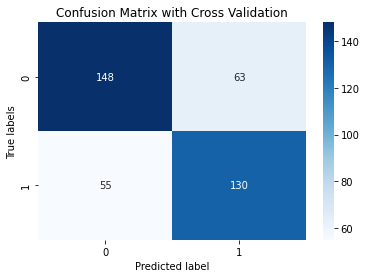

In [33]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, model_cv.predict(X_test))), annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Cross Validation');

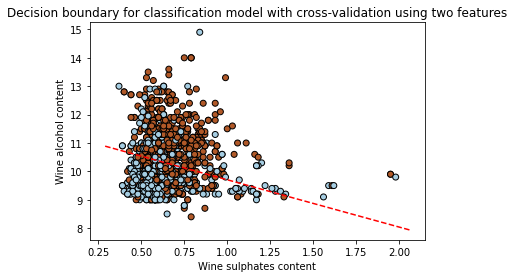

In [34]:
#Decision boundary
import numpy as np
import matplotlib.pyplot as plt


X = X [['sulphates', 'alcohol']]
model = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
model.fit(X, y)


plt.scatter(X['sulphates'].values, X['alcohol'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Wine sulphates content')
plt.ylabel('Wine alcohol content')


plt.title('Decision boundary for classification model with cross-validation using two features')

plt.show()